In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy.stats import norm
from scipy.ndimage import histogram

In [3]:
# import and check data
import pandas as pd
df = pd.read_csv('pendulumData.csv')
g = df['g (m/s2)'].to_numpy()
g_f = g[~ np.isnan(g)]
g_f = np.delete(g_f, 4)
print(g_f)
mean = np.mean(g_f)
print(mean)
samplestd = np.std(g_f, ddof=1)
print(samplestd)
N = len(g_f)
print(N)
meanstd = samplestd/(N**0.5)
print(meanstd)

[ 9.83    9.06    9.79    9.882   9.807   9.28    9.811   9.26    9.8095
  9.68    9.795   9.62    9.779  10.63    9.565   9.857   9.56    9.815
  9.8079  9.8     9.76    9.75    9.8608  9.8078  9.685  10.72    9.23
  9.933   9.766   9.79    9.7     9.7     9.1     9.7    11.      9.8
  9.7    10.3     9.77    9.3    10.5     9.05    9.779   9.821   9.78
  9.2    10.     10.1    10.19   12.22   10.176   9.67    9.7     8.68
  9.87    7.73    8.19    9.594   9.78   10.56    9.63    9.9     9.73
  8.8     9.1   ]
9.731707692307692
0.6041559658181437
65
0.07493632487074035


In [4]:
# bin data
mins = 7.6
maxs = 12.4
nbin = 24
binned = histogram(g_f, mins, maxs, nbin)
bins = [mins + (maxs - mins)/nbin * i for i in range(nbin + 1)]
print(binned)
# print(bins)

[ 1  0  1  0  0  1  1  4  5  3 22 16  4  1  2  2  0  1  0  0  0  0  0  1]


In [5]:
# clean data and remove bins with zero counts
nonzero = np.nonzero(binned)
counts = [binned[i] for i in nonzero[0]]
print(counts)
err = np.sqrt(counts)
print(err)
nonempty = [(bins[i] + bins[i+1])/2 for i in nonzero[0]]
print(nonempty)

[1, 1, 1, 1, 4, 5, 3, 22, 16, 4, 1, 2, 2, 1, 1]
[1.         1.         1.         1.         2.         2.23606798
 1.73205081 4.69041576 4.         2.         1.         1.41421356
 1.41421356 1.         1.        ]
[7.699999999999999, 8.1, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9, 10.1, 10.3, 10.5, 10.7, 11.1, 12.3]


In [23]:
import scipy.optimize as opt
popt, pcov = opt.curve_fit(f=gaussian, xdata=nonempty, ydata=counts, sigma=err, p0=[9.8,0.2,13], absolute_sigma=True)
print(popt)
print(np.sqrt([pcov[i][i] for i in range(len(popt))]))
chi2final = chi2st(gaussian, popt, nonempty, counts, err)
print(chi2final)
dof = len(nonempty) - len(popt)
chi2red = chi2final/dof
print(chi2red)

[9.79468297 0.15860952 8.89954586]
[0.02409412 0.01930036 1.33413774]
20.50262692803742
1.7085522440031182


In [25]:
from scipy.stats import chi2
p = chi2.sf(chi2final, dof)
print(p)
# print(chi2.sf(1,1))

0.058155567150679446


In [48]:
import scipy.optimize as opt
popt2, pcov2 = opt.curve_fit(f=multiplegaussian, xdata=nonempty, ydata=counts, sigma=err, p0=[9.8,0.2,7,9.8,1,7], absolute_sigma=True)
print(popt2)
print(np.sqrt([pcov2[i][i] for i in range(len(popt2))]))
chi2finalmult = chi2st(multiplegaussian, popt2, nonempty, counts, err)
print(chi2finalmult)
df2 = len(nonempty) - len(popt2)
chi2redmult = chi2finalmult/df2
print(chi2redmult)

[9.7820209  0.12434526 7.4377076  9.87475304 1.83587222 8.04720072]
[0.0239122  0.02447432 1.39734964 0.75555126 1.13709252 3.67713431]
5.669545523434163
0.6299495026037959


In [27]:
from scipy.stats import chi2
p = chi2.sf(chi2finalmult, df2)
print(p)

0.7724815608086042


In [14]:
# gaussian
def gaussian(x, mu, sigma, a):
    return a/sigma/np.sqrt(2*np.pi) * np.exp(-(x-mu)**2/2/sigma**2)

In [6]:
# multiple gaussian
def multiplegaussian(x, mu1, sigma1, a1, mu2, sigma2, a2):
    return a1/sigma1/np.sqrt(2*np.pi) * np.exp(-(x-mu1)**2/2/sigma1**2) + a2/sigma2/np.sqrt(2*np.pi) * np.exp(-(x-mu2)**2/2/sigma2**2)

In [18]:
def chi2st(f, popt, x, y, err):
    ev = f(x, *popt)
    return np.sum((y-ev)**2/err**2)

<Figure size 432x288 with 0 Axes>

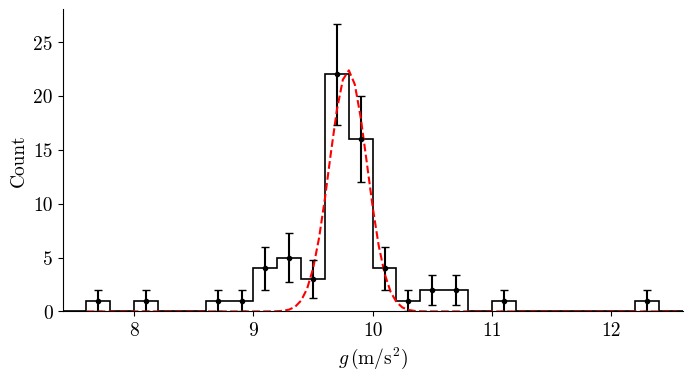

In [41]:
plt.clf()
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(g_f, bins=[7.399+0.2*i for i in range(27)], edgecolor='black', linewidth=1.2, color=(1,1,1,0), histtype='step')
#plt.bar(nonempty, counts, width=1, color=(1,1,1,0), yerr=err)
x = [7.6+0.05*i for i in range(100)]
plt.plot(x, gaussian(x, *popt), 'r--')
plt.errorbar(nonempty, counts, yerr=err, color='black', fmt='.', ecolor='black', capsize=3)
plt.xlabel(r'$g \, (\mathrm{m}/\mathrm{s}^2)$')
plt.ylabel('Count')
plt.xlim([7.4, 12.6])
# plt.title('Measured value of acceleration due to gravity')
# plt.text(11, 21, r'$\mu = 9.73$', horizontalalignment='left')
# plt.text(11, 18, r'$\sigma = 0.60$', horizontalalignment='left')
# plt.text(11, 15, r'$\sigma_\mu = 0.07$', horizontalalignment='left')
# plt.text(11, 12, r'$N = 65$', horizontalalignment='left')
fig.set_size_inches(8, 4)
fig.set_dpi(100)
plt.savefig('hist.png', bbox_inches='tight', pad_inches=0)

<Figure size 432x288 with 0 Axes>

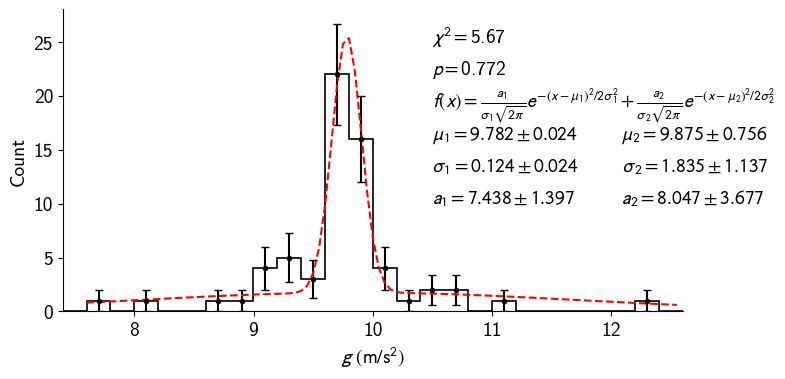

In [65]:
plt.clf()
plt.rcParams.update({'font.size': 14})
#plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
plt.rcParams.update({'font.family': 'cmss10', 'mathtext.fontset': 'stixsans'})
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(g_f, bins=[7.399+0.2*i for i in range(27)], edgecolor='black', linewidth=1.2, color=(1,1,1,0), histtype='step')
#plt.bar(nonempty, counts, width=1, color=(1,1,1,0), yerr=err)
x = [7.6+0.05*i for i in range(100)]
plt.plot(x, multiplegaussian(x, *popt2), 'r--')
plt.errorbar(nonempty, counts, yerr=err, color='black', fmt='.', ecolor='black', capsize=3)
plt.xlabel(r'$g \,\, (\mathrm{m}/\mathrm{s}^2)$')
plt.ylabel('Count')
plt.xlim([7.4, 12.6])
# plt.title('Measured value of acceleration due to gravity')
plt.text(10.5, 25, r'$\chi^2 = $' + str(round(chi2finalmult, 3)), horizontalalignment='left')
plt.text(10.5, 22, r'$p = $' + str(round(p, 3)), horizontalalignment='left')
plt.text(10.5, 19, r'$f(x) = \frac{a_1}{\sigma_1 \sqrt{2\pi}} e^{-(x-\mu_1)^2 / 2 \sigma_1^2} + \frac{a_2}{\sigma_2 \sqrt{2\pi}} e^{-(x-\mu_2)^2 / 2 \sigma_2^2}$', horizontalalignment='left')
plt.text(10.5, 16, r'$\mu_1 = 9.782 \pm 0.024$' + '\t' + r'$\mu_2 = 9.875 \pm 0.756$', horizontalalignment='left')
plt.text(10.5, 13, r'$\sigma_1 = 0.124 \pm 0.024 $' + '\t    ' + r'$\sigma_2 = 1.835 \pm 1.137$', horizontalalignment='left')
plt.text(10.5, 10, r'$a_1 = 7.438 \pm 1.397 \,$' + '\t ' + r'$a_2 = 8.047 \pm 3.677$', horizontalalignment='left')
fig.set_size_inches(8, 4)
fig.set_dpi(100)
plt.savefig('histmult.pdf', bbox_inches='tight', pad_inches=0)